### A. Data Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Open file and inspect first five rows.
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
# Check number of rows.
df.shape

(30931, 21)

In [4]:
# Run descriptive statistics.
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,30931.000000,2.419700e+04,30930.000000,30930.000000,23868.000000,23862.000000,23497.000000,20405.000000,12397.000000,14109.000000,24089.000000,24089.00000,30928.000000
mean,3.019010,1.052590e+06,10.971843,3114.523893,3.047721,1.609295,1.700047,587.098848,158.342861,1965.130555,-37.811520,145.00154,7556.233801
std,0.974469,6.444995e+05,6.635226,105.563863,0.992084,0.724147,1.002888,3540.105451,418.091659,37.341867,0.087693,0.11654,4431.153039
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.42379,83.000000
25%,2.000000,6.350000e+05,6.400000,3049.000000,2.000000,1.000000,1.000000,206.000000,100.000000,1940.000000,-37.862000,144.93540,4383.750000
50%,3.000000,8.750000e+05,10.200000,3103.000000,3.000000,1.000000,2.000000,500.000000,133.000000,1970.000000,-37.808200,145.00700,6763.000000
75%,4.000000,1.300000e+06,13.800000,3153.000000,4.000000,2.000000,2.000000,667.000000,185.000000,2000.000000,-37.756000,145.06960,10331.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.395100,145.52635,21650.000000


In [5]:
# Confirm number of records with nulls for each column.
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6734
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          7063
Bathroom          7069
Car               7434
Landsize         10526
BuildingArea     18534
YearBuilt        16822
CouncilArea          3
Lattitude         6842
Longtitude        6842
Regionname           3
Propertycount        3
dtype: int64

In [6]:
# Return column data type.
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

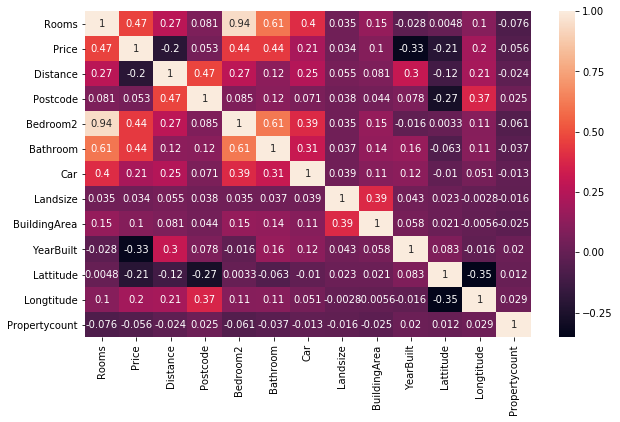

In [7]:
# Check correlations.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot= True, annot_kws={"size": 10})

In [8]:
# Drop unnecessary, redundant and highly correlated variables (i.e., Bedroom2 vs. Rooms).
df = df.drop(['Address', 'SellerG', 'Date', 'Postcode', 'Bedroom2', 'CouncilArea', 'Suburb'], axis=1)

Compare the mean absolute errors (MAE) when the nulls are imputed with zeroes, the means, or completely removed. The dataframe with the lowest MAE will be used for analysis.

#### 1. Zero-Imputed

In [9]:
# Create a feature set consisting of the float columns.
flo_feat = df.select_dtypes(exclude=['object'])

# Create the zero-imputed dataframe.
df_fz = flo_feat.fillna(0)

# Split the dataframe into a train and test set.
from sklearn.model_selection import train_test_split
X_train_fz, X_test_fz, y_train_fz, y_test_fz = train_test_split(df_fz.drop(['Price'],axis=1), df_fz['Price'], test_size=0.3, random_state=123)

# Fit and run a linear regression model.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_fz, y_train_fz)
lr_pred_fz = lr.predict(X_test_fz)

# Return the mean absolute error.
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test_fz, lr_pred_fz))

MAE:  467791.2162


#### 2. Mean-Imputed

In [10]:
# Create the mean-imputed dataframe.
df_im = flo_feat.fillna(flo_feat.mean())

# Split the dataframe into a train and test set.
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(df_im.drop(['Price'],axis=1), df_im['Price'], test_size=0.3, random_state=123)

# Fit and run a linear regression model.
lr.fit(X_train_im, y_train_im)
lr_pred_im = lr.predict(X_test_im)

# Return the mean absolute error.
print('MAE: ', metrics.mean_absolute_error(y_test_im, lr_pred_im))

MAE:  303326.972176


#### 3. Removed

In [11]:
# Create the dataframe where null rows are dropped.
df_d = flo_feat.dropna()

# Split the dataframe into a train and test set.
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(df_d.drop(['Price'],axis=1), df_d['Price'], test_size=0.3, random_state=123)

# Fit and run a linear regression model.
lr.fit(X_train_d, y_train_d)
lr_pred_d = lr.predict(X_test_d)

# Return the mean absolute error.
print('MAE: ', metrics.mean_absolute_error(y_test_d, lr_pred_d))

MAE:  283495.18597


Dropping the null rows provides the best result and will therefore be used.

In [12]:
# Create the final dataframe with the the desired features and null rows dropped.
df_dr = df.dropna()
df_dr.shape

(7979, 14)

In [13]:
# Create dummies for object features.
df_final = pd.concat([df_dr, pd.get_dummies(df_dr[['Regionname', 'Type', 'Method']])], axis=1)

# Create an age feature based on the year built column.
df_final['age'] = 2018 - df_final['YearBuilt']
df_final['age'] = np.where(df_final['age']>20, 1, 0)

# Drop the redundant features. 
df_final = df_final.drop(['YearBuilt', 'Regionname', 'Type', 'Method'], axis=1)
df_final.shape

(7979, 27)

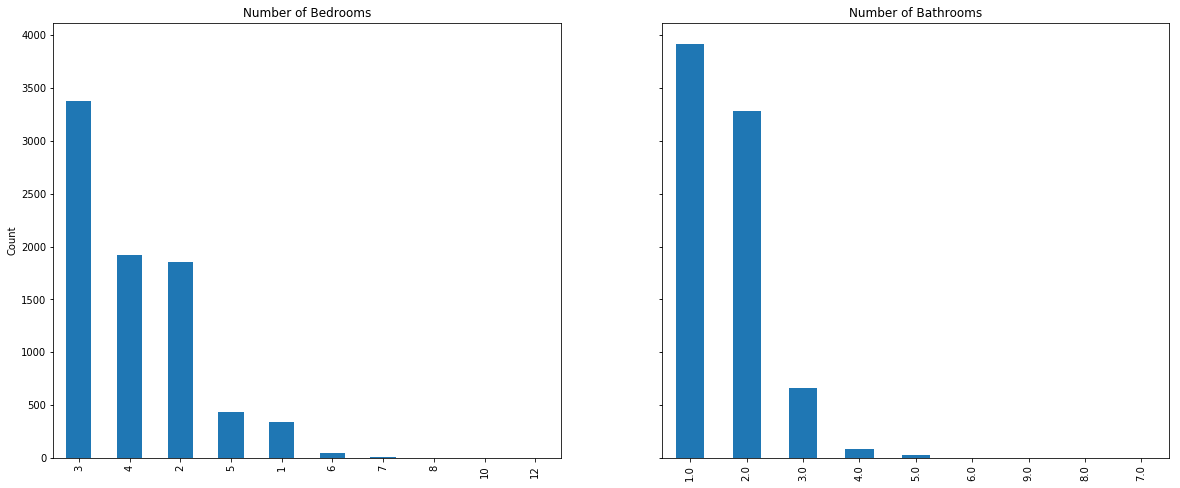

In [14]:
# Show distribution of bedrooms and bathrooms.
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,sharey=True, figsize=(20, 8))

df_final['Rooms'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Number of Bedrooms')
ax1.set_ylabel('Count')

df_final['Bathroom'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_title('Number of Bathrooms')
plt.show()

Three-bedroom and one-bathroom homes are most prominent.

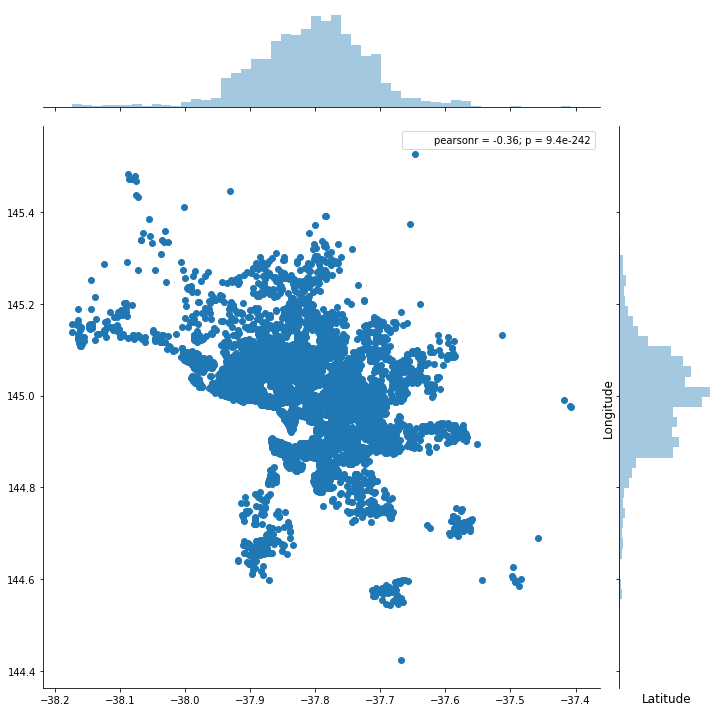

In [15]:
# Visualize the home locations based on latitude and longitude.
plt.figure(figsize=(10,10))
sns.jointplot(x=df_final.Lattitude.values, y=df_final.Longtitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

The homes are concentrated in the -37.9 to -37.9 latitude and 144.9 to 145.1 longitude.

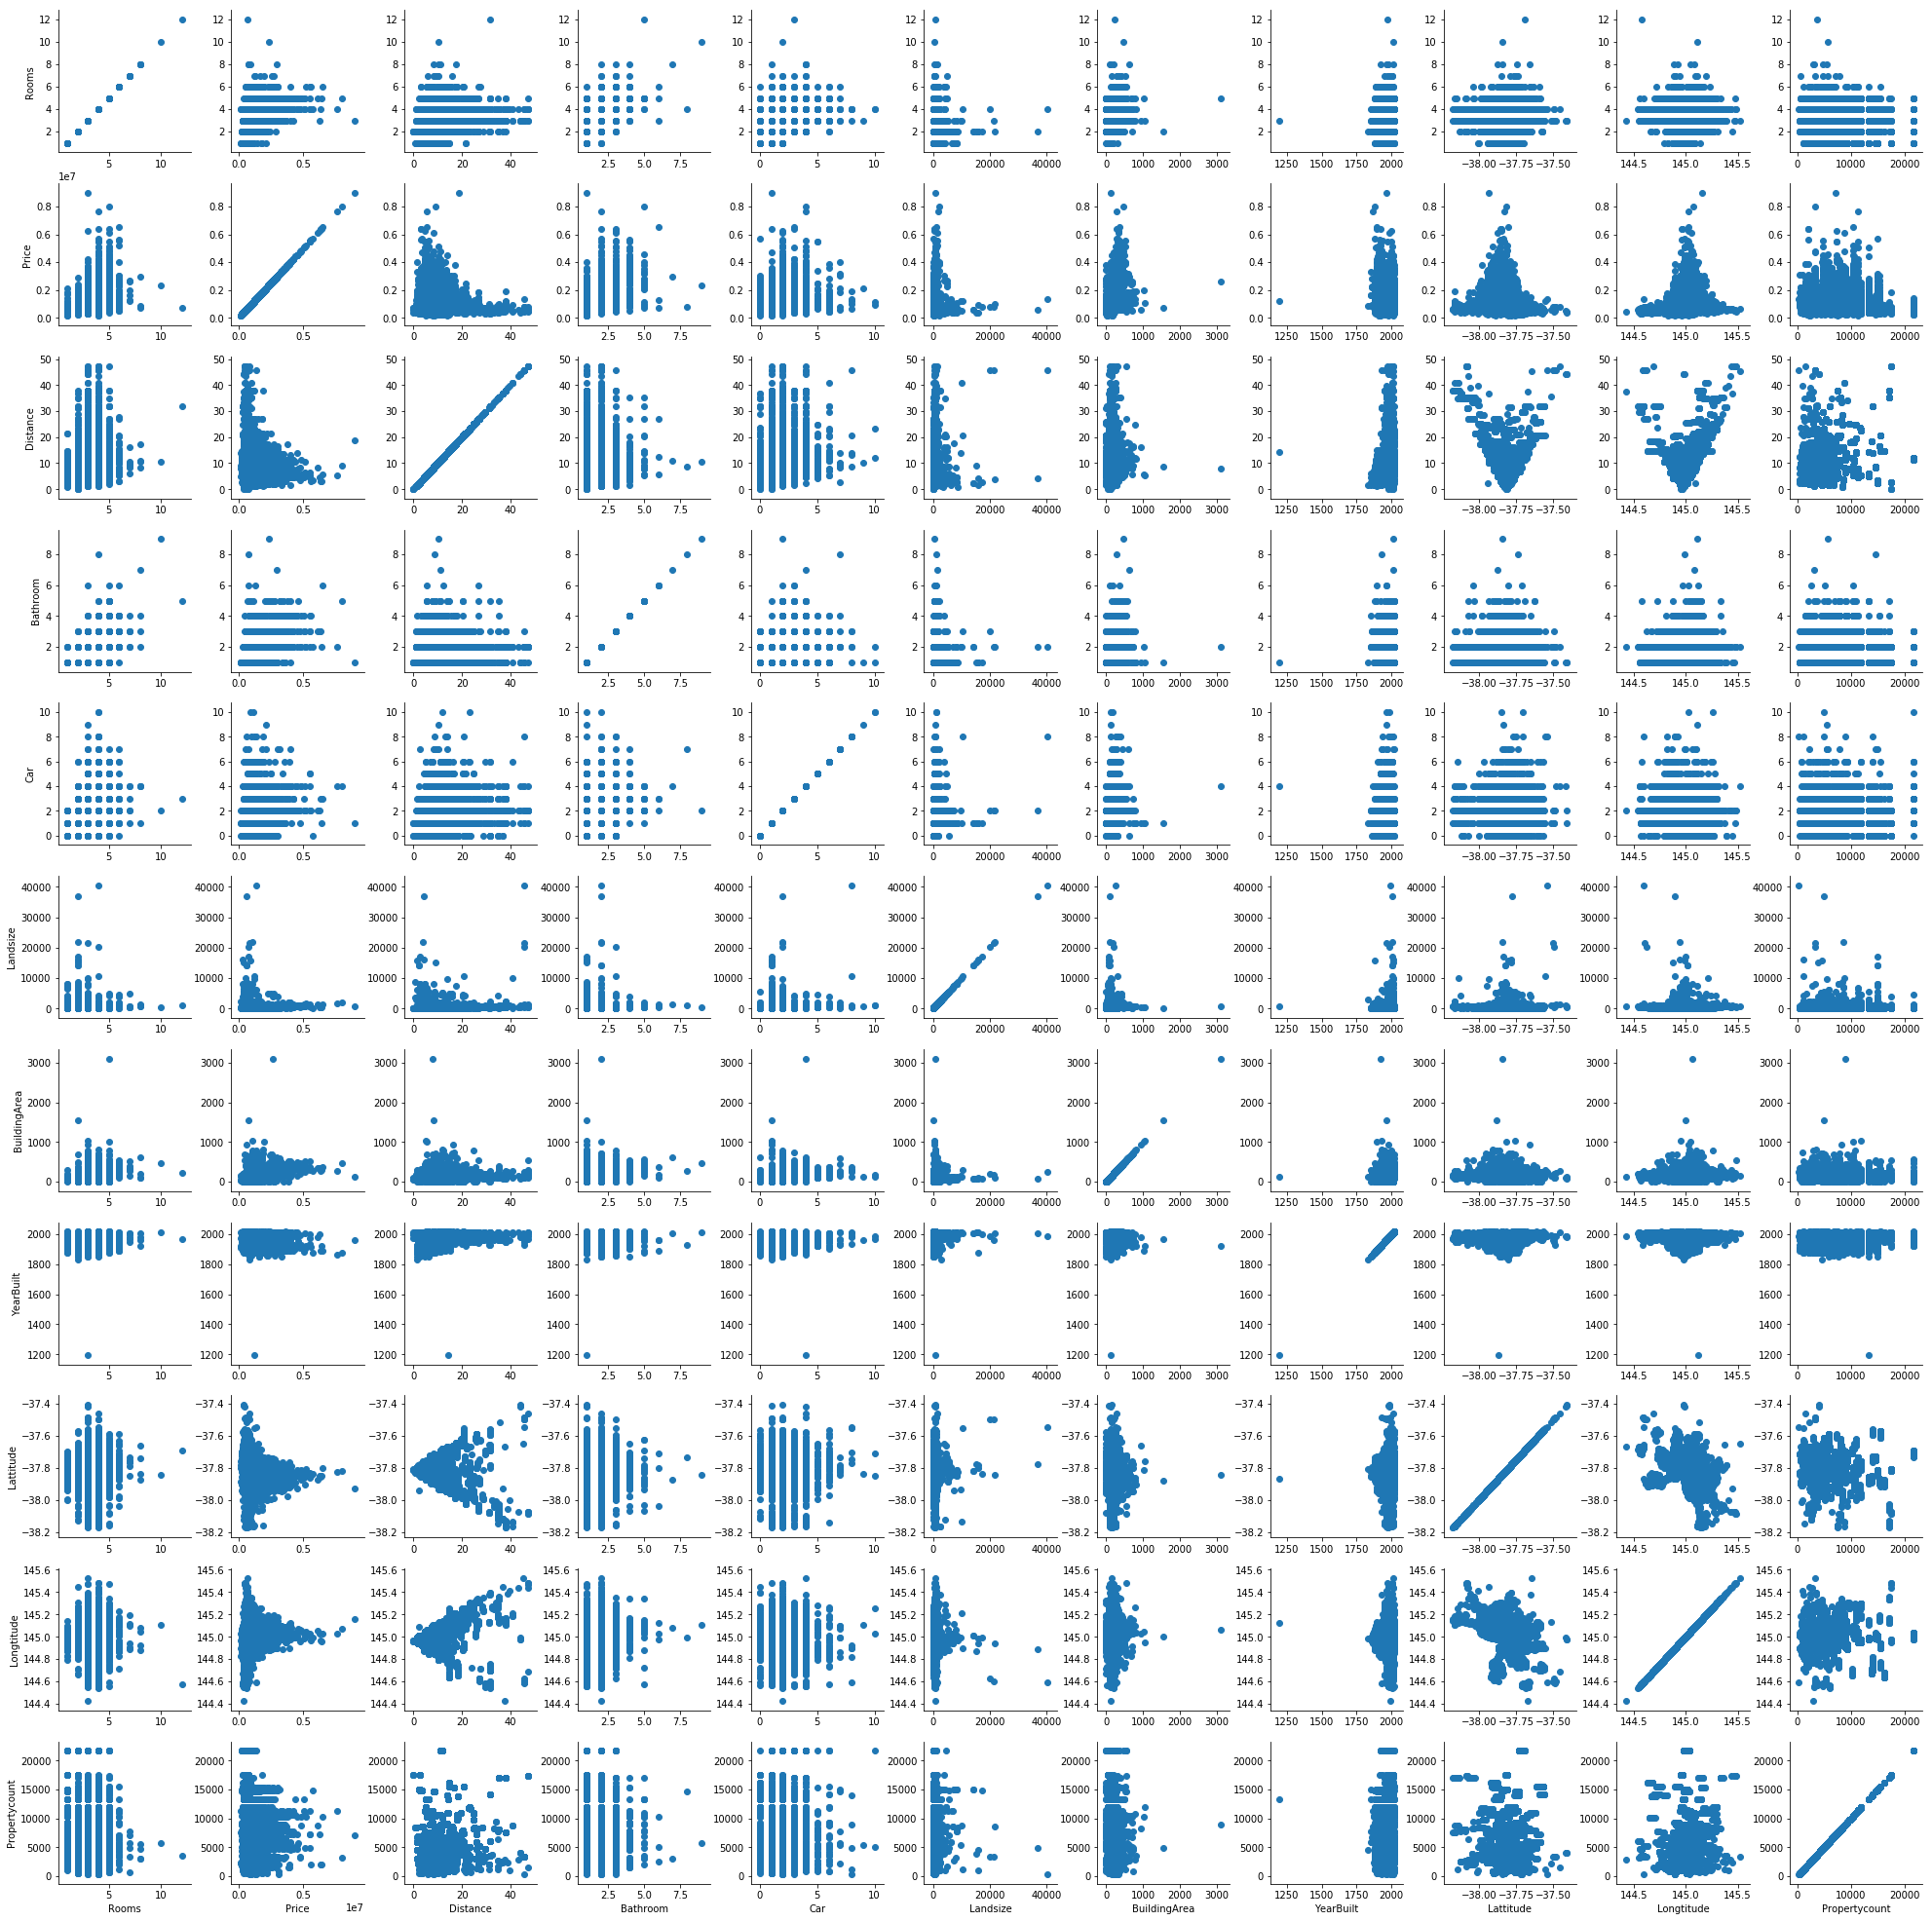

In [16]:
# Create scatterplots showing numeric feature relationships.
g = sns.PairGrid(df_d)
g = g.map(plt.scatter)

### B. Models

#### 1. Linear Regression

In [17]:
# Split the dataframe into a train and test set.
X = df_final.drop('Price',axis=1)
Y = df_final['Price']
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, Y, test_size=0.3, random_state=123)

# Fit and run a linear regression model.
lr.fit(X_train_final, y_train_final)
lr_pred_final = lr.predict(X_test_final)

# Print score and errors.
print('Score: ', lr.score(X_test_final, y_test_final))
print('MAE: ', metrics.mean_absolute_error(y_test_final, lr_pred_final))
print('MSE: ', metrics.mean_squared_error(y_test_final, lr_pred_final))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_final, lr_pred_final)))

Score:  0.640548069799
MAE:  271932.053526
MSE:  171430857321.0
RMSE:  414042.096074


#### 2. Gradient Boost

In [18]:
# Fit and run a gradient boost model.
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='huber')
clf.fit(X_train_final, y_train_final)
clf_pred = clf.predict(X_test_final)

# Print score and errors.
print('Score: ', clf.score(X_test_final, y_test_final))
print('MAE: ', metrics.mean_absolute_error(y_test_final, clf_pred))
print('MSE: ', metrics.mean_squared_error(y_test_final, clf_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_final, clf_pred)))

Score:  0.841947906096
MAE:  160651.599115
MSE:  75378663133.6
RMSE:  274551.749464


#### 3. Random Forest

In [19]:
# Fit and run a random forest model.
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_final, y_train_final)
rf_pred = rf.predict(X_test_final)

# Print score and errors.
print('Score: ', rf.score(X_test_final, y_test_final))
print('MAE: ', metrics.mean_absolute_error(y_test_final, rf_pred))
print('MSE: ', metrics.mean_squared_error(y_test_final, rf_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_final, clf_pred)))

Score:  0.809622806024
MAE:  177929.394918
MSE:  90795243635.4
RMSE:  274551.749464


#### 4. Feature Selection with Gradient Boost

Run an automatic feature selection technique that feeds into the gradient boost model and determine the optimum number of features that yields the highest score.

In [20]:
# Convert latitude to absolute to prevent negative value error. 
df_final['Lattitude'] = df_final['Lattitude'].abs()
X = df_final.drop('Price',axis=1)

# Find the optimum number of features (k) for SelectKBest.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
for k in range(1,df_final.shape[1]):
    X_skb = SelectKBest(chi2, k=k).fit_transform(X, Y)
    X_train_skb, X_test_skb, y_train_skb, y_test_skb = train_test_split(X_skb, Y, test_size = .3, random_state=25)
    clf.fit(X_train_skb, y_train_skb)
    clf_pred_skb = clf.predict(X_test_skb)
    print('Score at k =', k, ':', clf.score(X_test_skb, y_test_skb))

Score at k = 1 : 0.305855581959
Score at k = 2 : 0.479648061835
Score at k = 3 : 0.71566394067
Score at k = 4 : 0.785331229035
Score at k = 5 : 0.789303275381
Score at k = 6 : 0.794327390143
Score at k = 7 : 0.796484069358
Score at k = 8 : 0.798612775773
Score at k = 9 : 0.815413896622
Score at k = 10 : 0.814873600868
Score at k = 11 : 0.813650056342
Score at k = 12 : 0.812146891408
Score at k = 13 : 0.813442240573
Score at k = 14 : 0.816775329258
Score at k = 15 : 0.813160703237
Score at k = 16 : 0.818204732869
Score at k = 17 : 0.814289332503
Score at k = 18 : 0.816373324017
Score at k = 19 : 0.776983646984
Score at k = 20 : 0.839999915264
Score at k = 21 : 0.824709242065
Score at k = 22 : 0.825168866978
Score at k = 23 : 0.8220073679
Score at k = 24 : 0.81335093654
Score at k = 25 : 0.844687163341
Score at k = 26 : 0.85756902459


Although gradient boost by itself yielded the highest score, it was accomplished with all 27 features. The automatic feature selection, on the other hand, showed that at nine features, a relatively high accuracy can be achieved, and that meaningful improvements won't be obtained until the number of features are close to the original.